<a href="https://colab.research.google.com/github/divy22x/codsoft/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score

In [ ]:
data=pd.read_csv("/content/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
numerical = len(data.select_dtypes(include=['int64', 'float64']).columns)
categorical = len(data.select_dtypes(include=['object']).columns)
print("Number of numerical features :", numerical)
print("Number of categorical features :", categorical)

Number of numerical features : 11
Number of categorical features : 3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data = data.drop(['CustomerId','Surname'],axis=1)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


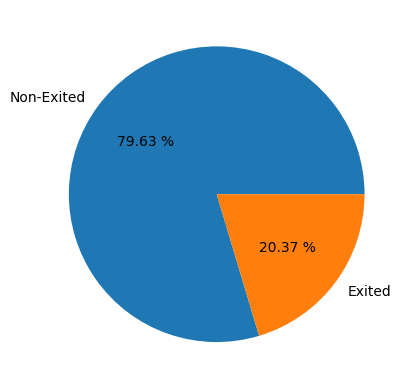

In [ ]:
plt.pie(data['Exited'].value_counts(),labels = ['Non-Exited','Exited'],autopct  = '%.2f %%')
plt.show()

<Axes: xlabel='Age', ylabel='Balance'>

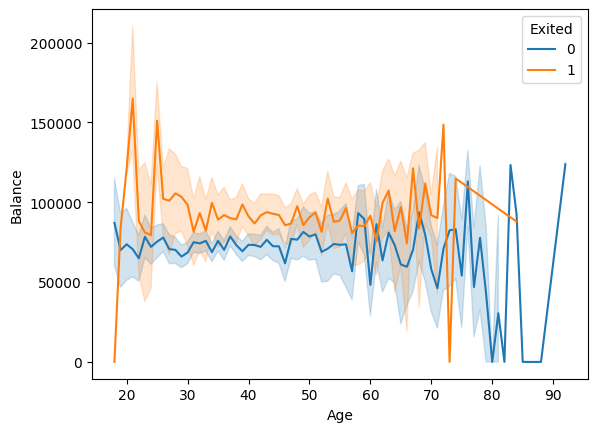

In [ ]:
sns.lineplot(x=data.Age,y=data.Balance, hue=data.Exited)

<Axes: xlabel='Tenure', ylabel='Balance'>

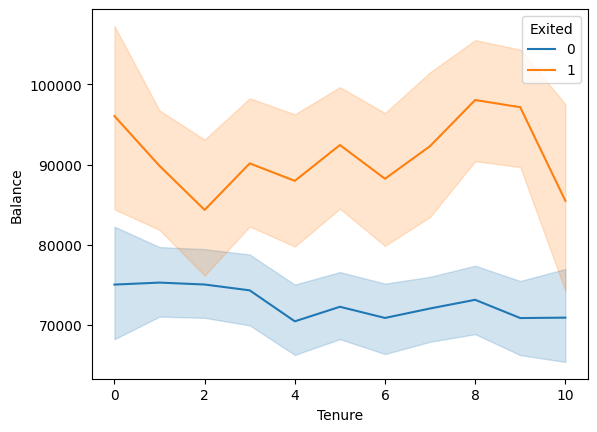

In [ ]:
sns.lineplot(y=data.Balance, x=data.Tenure, hue=data.Exited)


<ipython-input-153-ca89f256d03c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col])


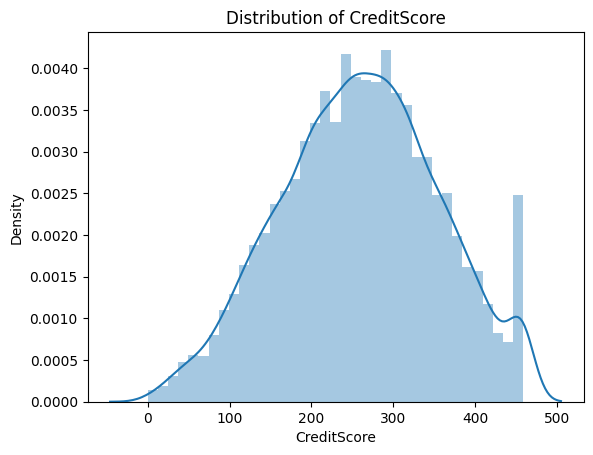

<ipython-input-153-ca89f256d03c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col])


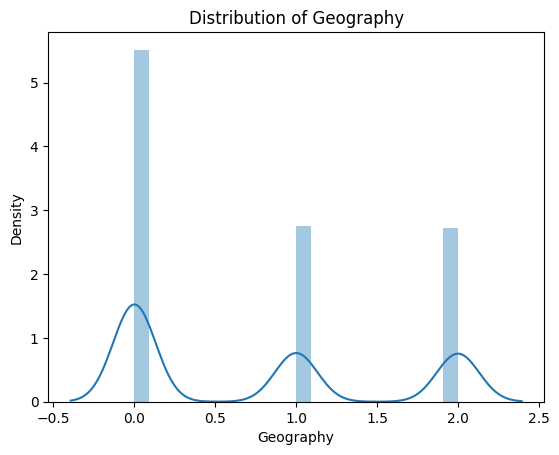

<ipython-input-153-ca89f256d03c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col])


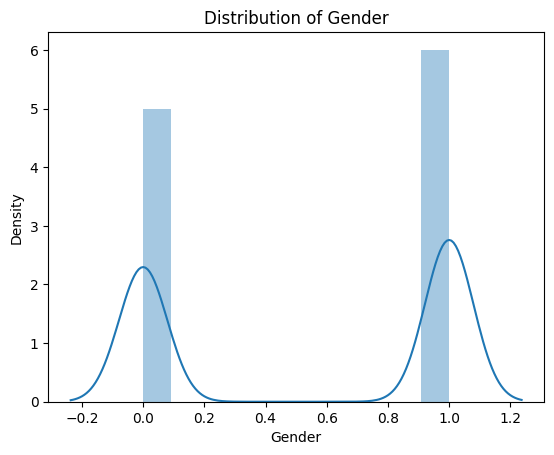

<ipython-input-153-ca89f256d03c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col])


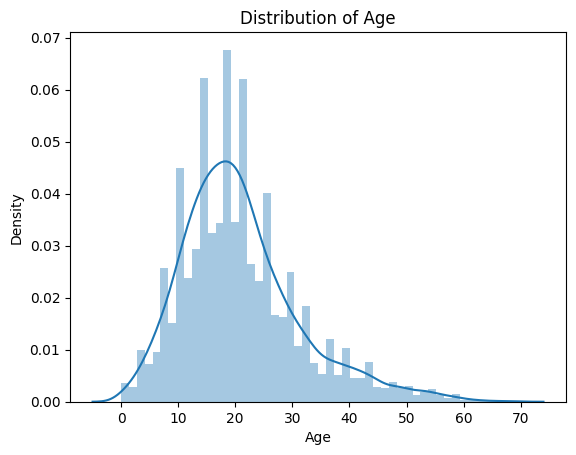

<ipython-input-153-ca89f256d03c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col])


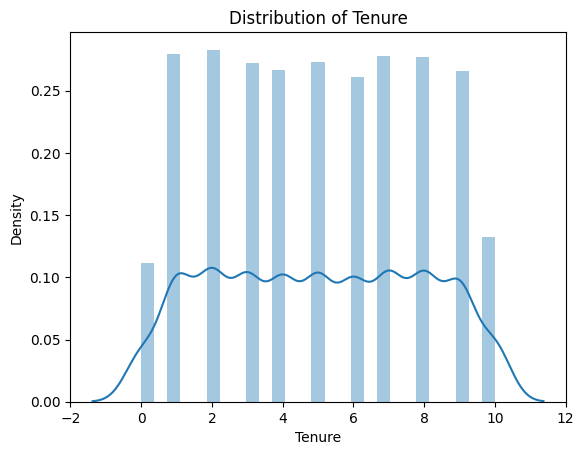

<ipython-input-153-ca89f256d03c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col])


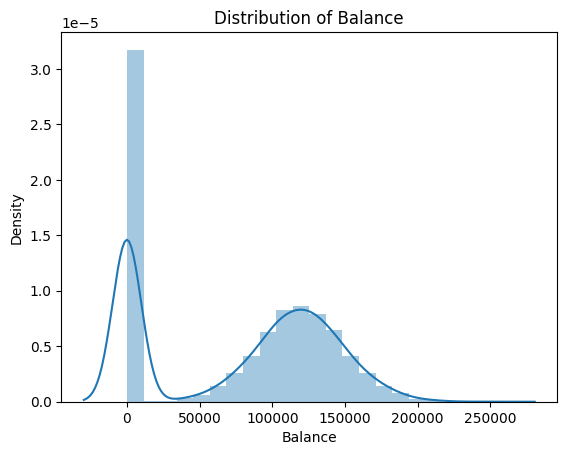

<ipython-input-153-ca89f256d03c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col])


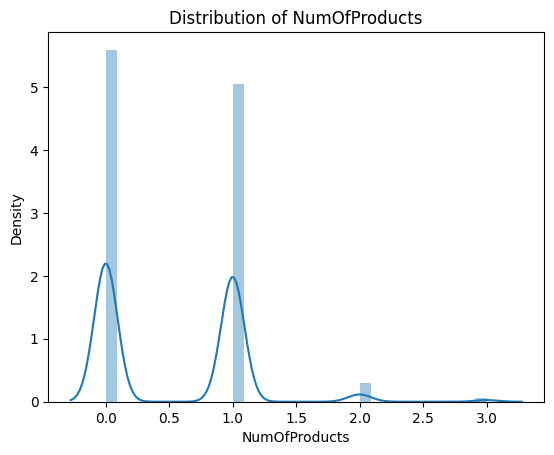

<ipython-input-153-ca89f256d03c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col])


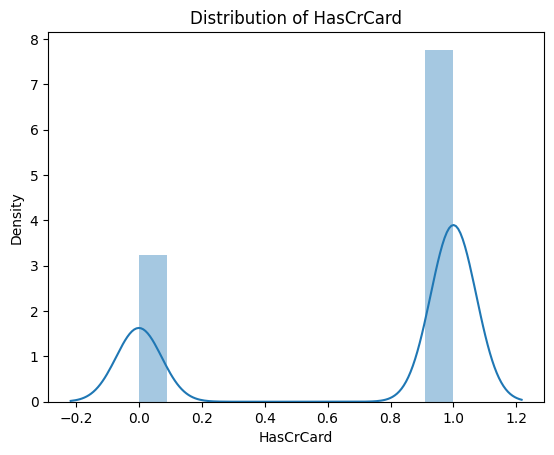

<ipython-input-153-ca89f256d03c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col])


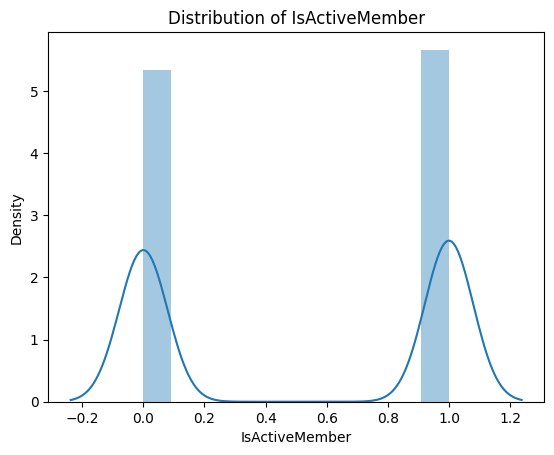

<ipython-input-153-ca89f256d03c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col])


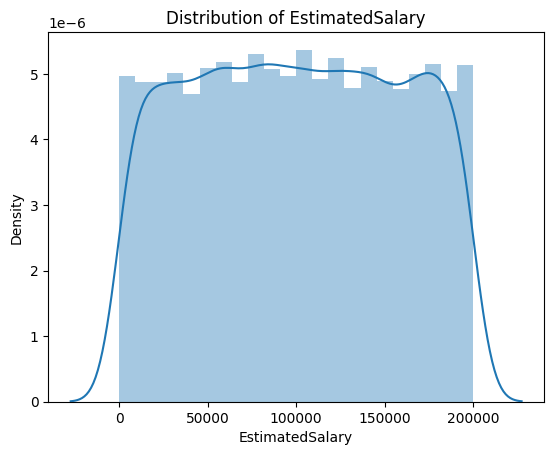

<ipython-input-153-ca89f256d03c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col])


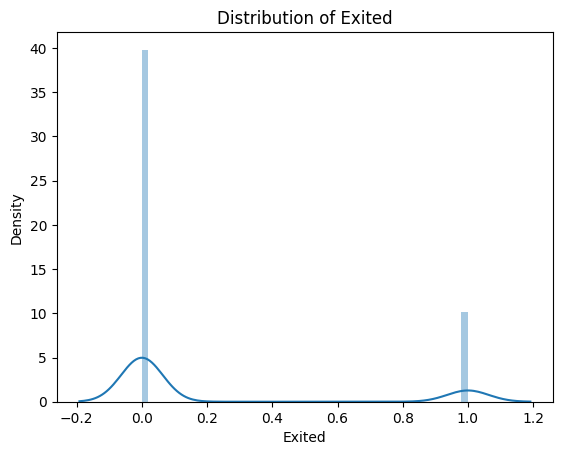

In [ ]:
numeric = data.select_dtypes(include = 'number')
for col in list(numeric)[1:]:

    plt.title(f"Distribution of {col}")
    ax = sns.distplot(data[col])
    plt.show()

In [ ]:
temp_df = data.loc[data['Exited']==1,['Geography','Exited']]
temp_df = temp_df.groupby(by=['Geography'])['Exited'].count().reset_index()

temp_df1 = data.loc[data['Exited']==0,['Geography','Exited']]
temp_df1 = temp_df1.groupby(by=['Geography'])['Exited'].count().reset_index()

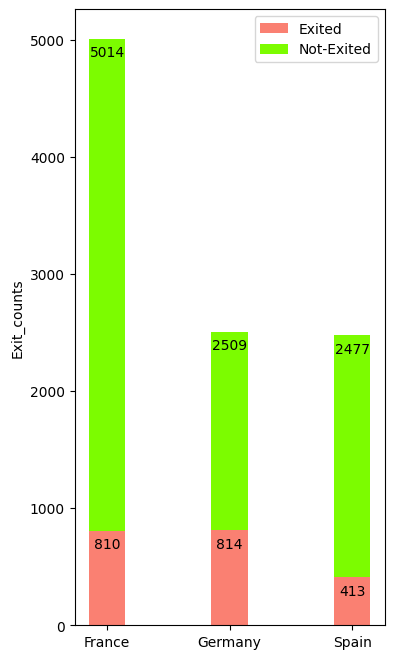

In [ ]:
fig, ax = plt.subplots(figsize=(4,8))
p1=ax.bar(temp_df['Geography'], temp_df['Exited'], 0.3,  label= 'Exited',color = 'salmon')
p2=ax.bar(temp_df1['Geography'], temp_df1['Exited'], 0.3, bottom=temp_df['Exited'],
       label='Not-Exited',color = 'lawngreen')

ax.set_ylabel('Exit_counts')
ax.bar_label(p1, label_type='edge',padding = -15)
ax.bar_label(p2, label_type='edge',padding = -15)
ax.legend()
plt.show()

In [ ]:
temp_df = data.loc[data['Exited']==1,['Gender','Exited']]
temp_df = temp_df.groupby(by=['Gender'])['Exited'].count().reset_index()
temp_df1 = data.loc[data['Exited']==0,['Gender','Exited']]
temp_df1 = temp_df1.groupby(by=['Gender'])['Exited'].count().reset_index()

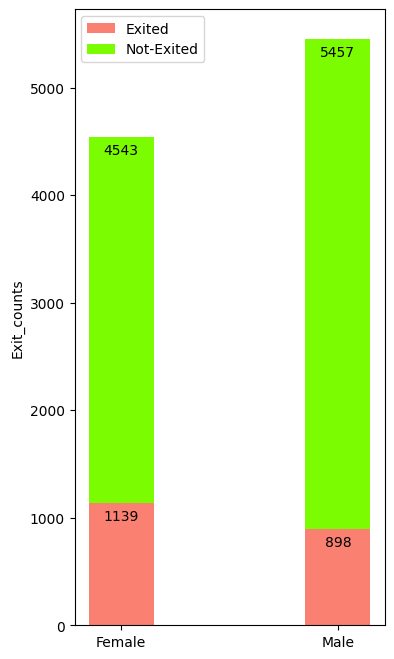

In [ ]:
fig, ax = plt.subplots(figsize=(4,8))
p1=ax.bar(temp_df['Gender'], temp_df['Exited'], 0.3,  label= 'Exited',color = 'salmon')
p2=ax.bar(temp_df1['Gender'], temp_df1['Exited'], 0.3, bottom=temp_df['Exited'],
       label='Not-Exited',color = 'lawngreen')
ax.set_ylabel('Exit_counts')
ax.bar_label(p1, label_type='edge',padding = -15)
ax.bar_label(p2, label_type='edge',padding = -15)
ax.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for column in data.columns:
    if data[column].dtype==np.number:
        continue
    data[column]=le.fit_transform(data[column])

<ipython-input-111-0522e939fd42>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:
<ipython-input-111-0522e939fd42>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:
<ipython-input-111-0522e939fd42>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:
<ipython-input-111-0522e939fd42>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:
<ipython-input-111-0522e939fd42>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is d

In [ ]:
x=data.drop('Exited',axis=1)
y=data.Exited

In [ ]:
Geography_dummies=pd.get_dummies(data=data,columns=['Geography'])
Gender_dummies=Geography_dummies.replace(to_replace={'Gender': {'Female':1, 'Male':0}})

In [ ]:
data_encoded= Gender_dummies
data_encoded.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2
0,0,228,0,24,2,0.00,0,1,1,101348.88,1,1,0,0
1,1,217,0,23,1,83807.86,0,0,1,112542.58,0,0,0,1
2,2,111,0,24,8,159660.80,2,1,0,113931.57,1,1,0,0
3,3,308,0,21,1,0.00,1,0,0,93826.63,0,1,0,0
4,4,459,0,25,2,125510.82,0,1,1,79084.10,0,0,0,1


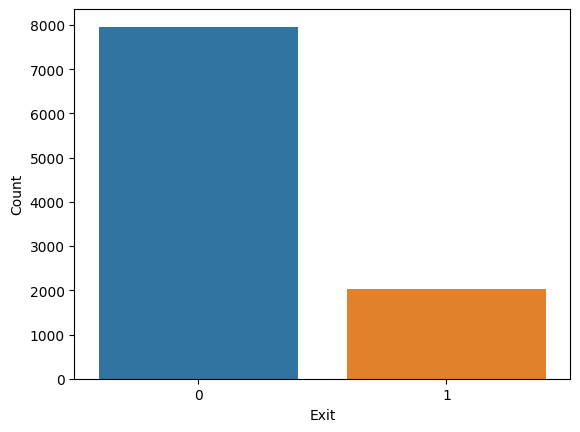

In [ ]:
sns.countplot(x=data_encoded['Exited'], data= data_encoded)
plt.xlabel('Exit')
plt.ylabel('Count')
plt.show()

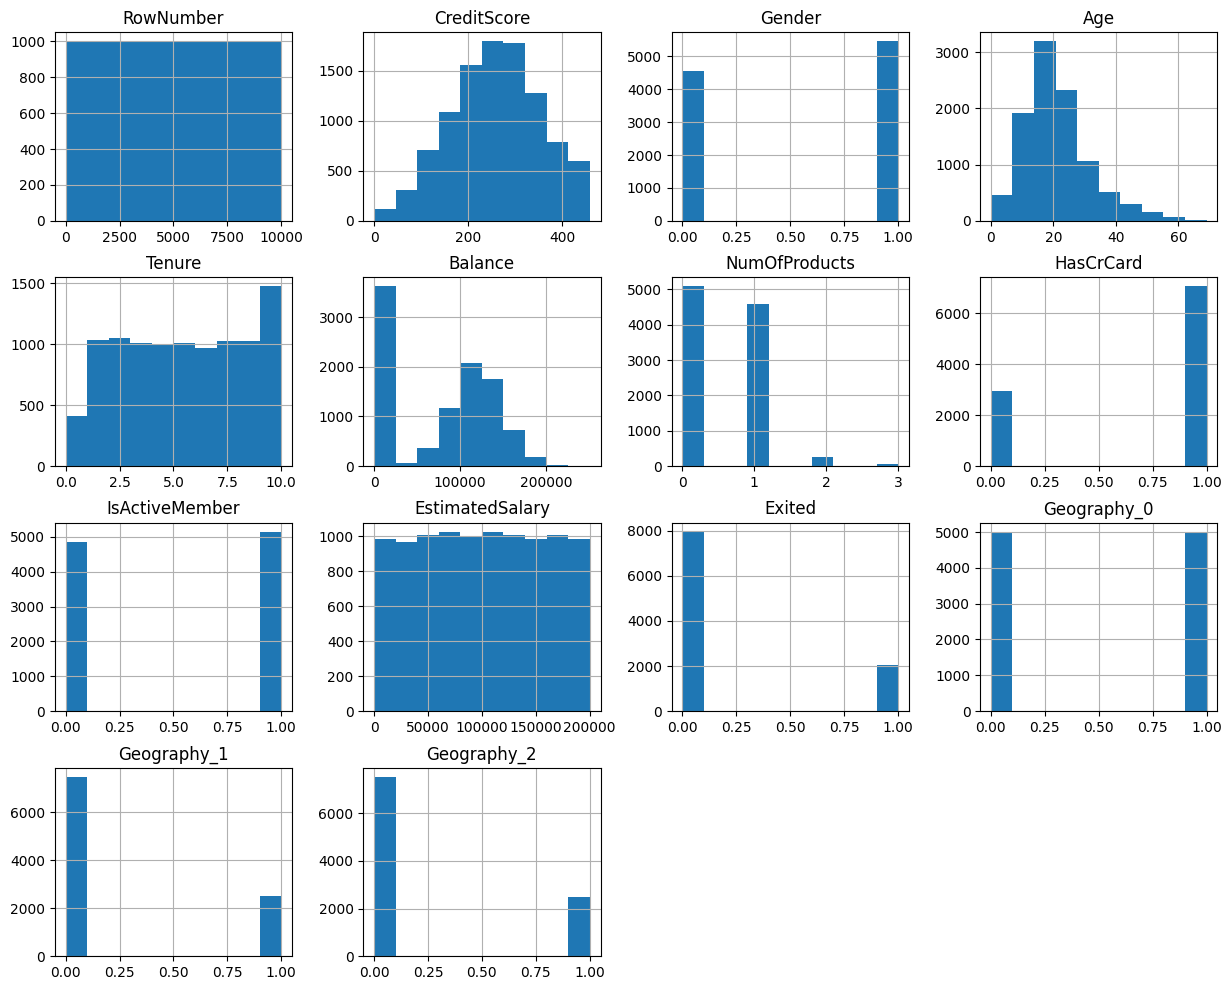

In [ ]:
data_encoded.hist(figsize=(15,12))
plt.title('Features Distribution')
plt.show()

In [ ]:
X = data.drop(["Exited"],axis=1)
y = data.loc[:,'Exited']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [ ]:
print(f'X train shape is: {X_train.shape}')
print(f'X test shape is: {X_test.shape}')
print(f'y train shape is: {y_train.shape}')
print(f'y test shape is: {y_test.shape}')

X train shape is: (7000, 11)
X test shape is: (3000, 11)
y train shape is: (7000,)
y test shape is: (3000,)


In [ ]:
X_train["Gender"].replace({"Male": 0}, inplace=True)
X_test["Gender"].replace({"Male": 0}, inplace=True)
X_train["Gender"].replace({"Female": 1}, inplace=True)
X_test["Gender"].replace({"Female": 1}, inplace=True)

In [ ]:
label_encoder = LabelEncoder()
X_train["Geography"] = label_encoder.fit_transform(X_train["Geography"])
X_test["Geography"] = label_encoder.transform(X_test["Geography"])

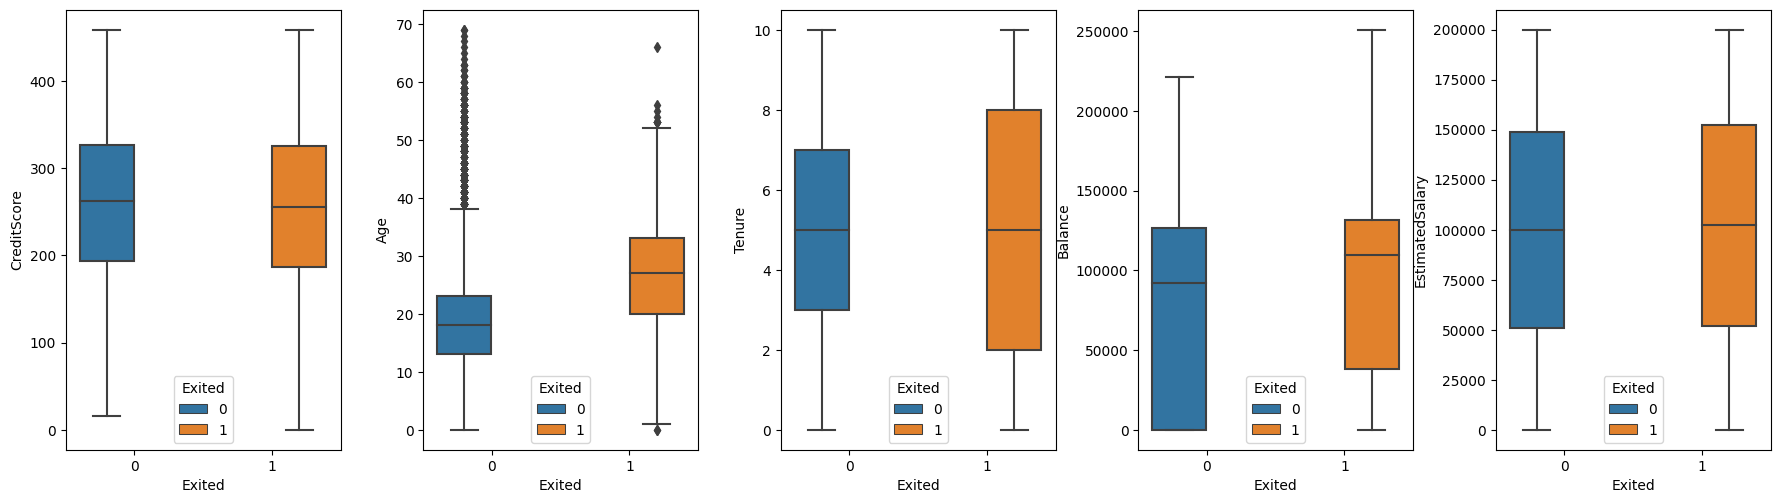

In [ ]:
plt.figure(figsize=(22,40))
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
j=1
for i in ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']:
    plt.subplot(6,5,j)
    sns.boxplot(y=data[i],x = 'Exited', hue = 'Exited',data = data, orient='v')
    j=j+1

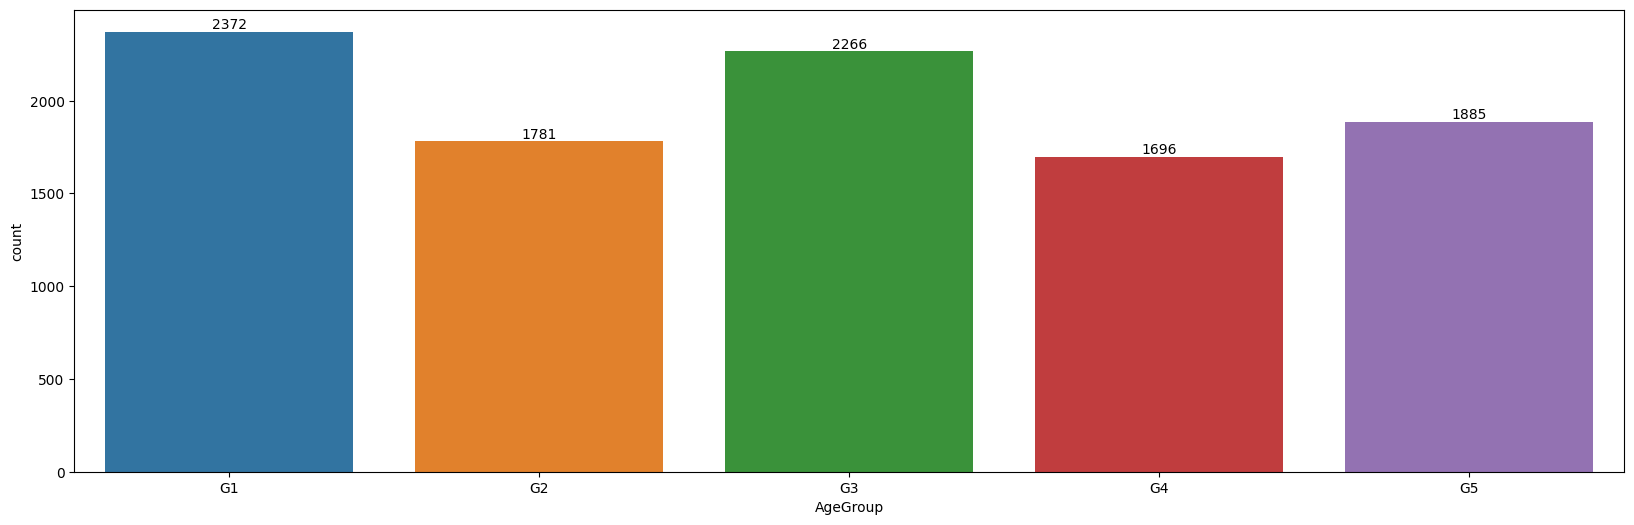

In [ ]:
data['AgeGroup'] = pd.qcut(data['Age'], q=5, labels=['G1','G2','G3','G4','G5'])

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x=data['AgeGroup'])
abs_values = data['AgeGroup'].value_counts().sort_index().values
ax.bar_label(container=ax.containers[0], labels=abs_values);

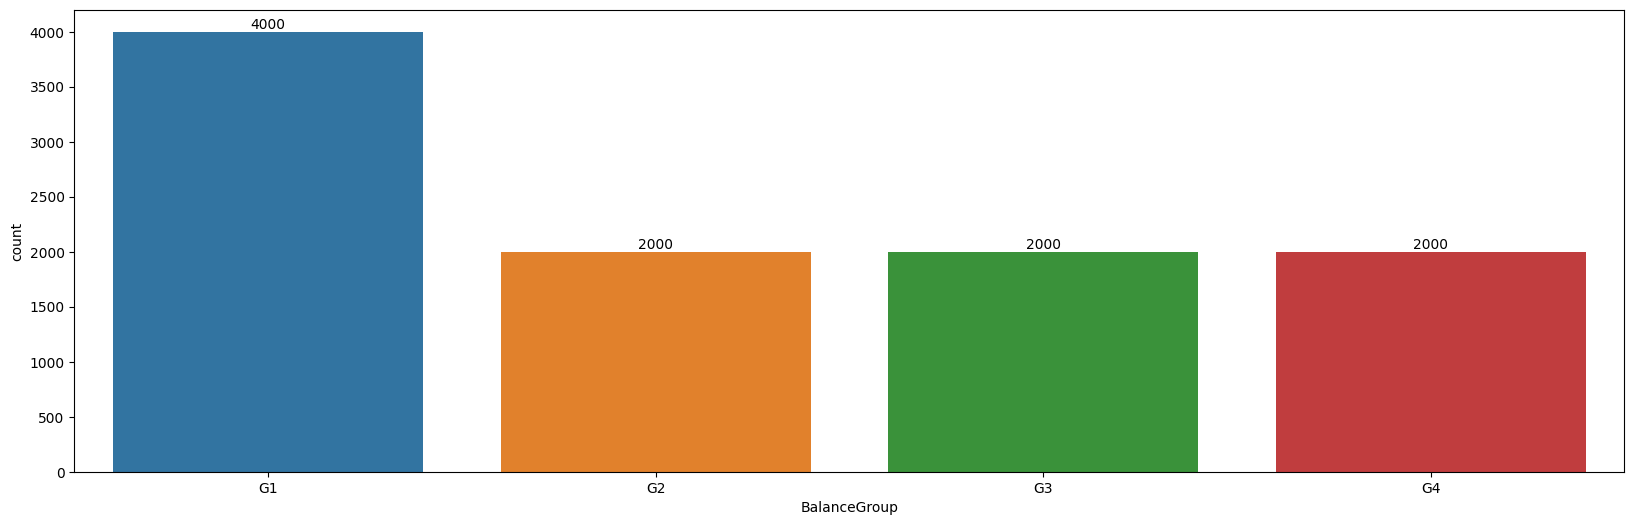

In [ ]:
data['BalanceGroup'] = pd.qcut(data['Balance'], q=5, duplicates='drop', labels=['G1','G2','G3','G4'])

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x=data['BalanceGroup'])
abs_values = data['BalanceGroup'].value_counts().sort_index().values
ax.bar_label(container=ax.containers[0], labels=abs_values);

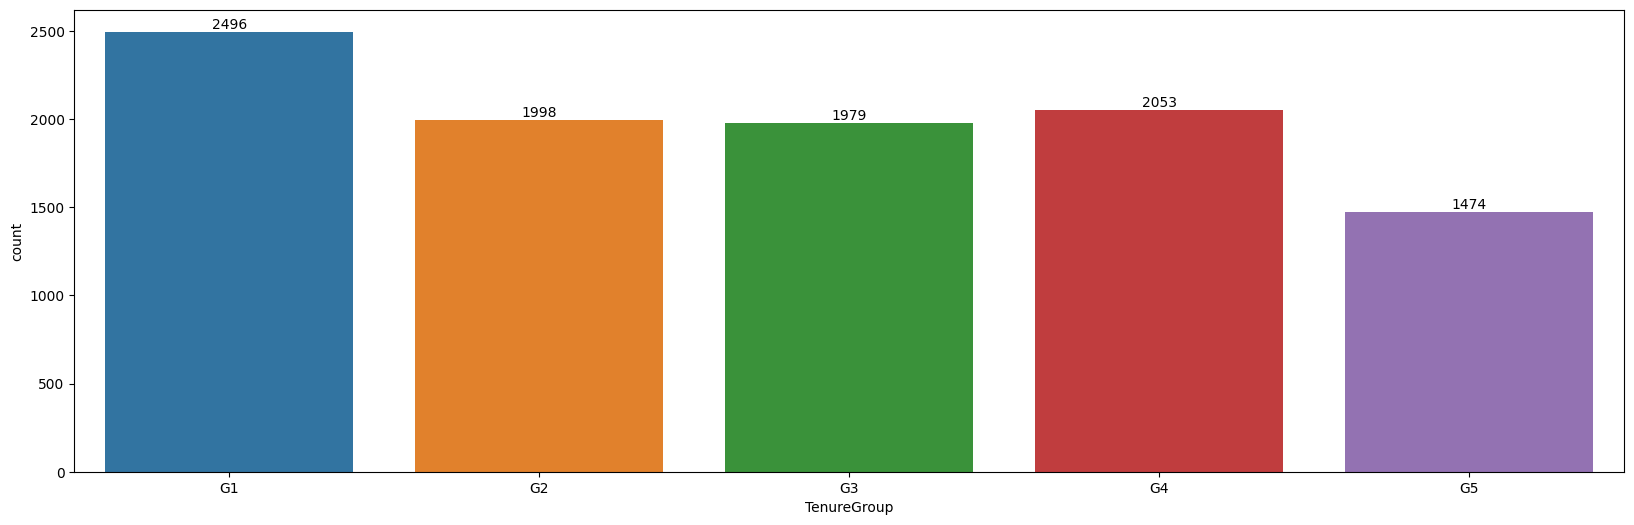

In [ ]:
data['TenureGroup'] = pd.qcut(data['Tenure'], q=5, labels=['G1','G2','G3','G4','G5'])

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x=data['TenureGroup'])
abs_values = data['TenureGroup'].value_counts().sort_index().values
ax.bar_label(container=ax.containers[0], labels=abs_values);

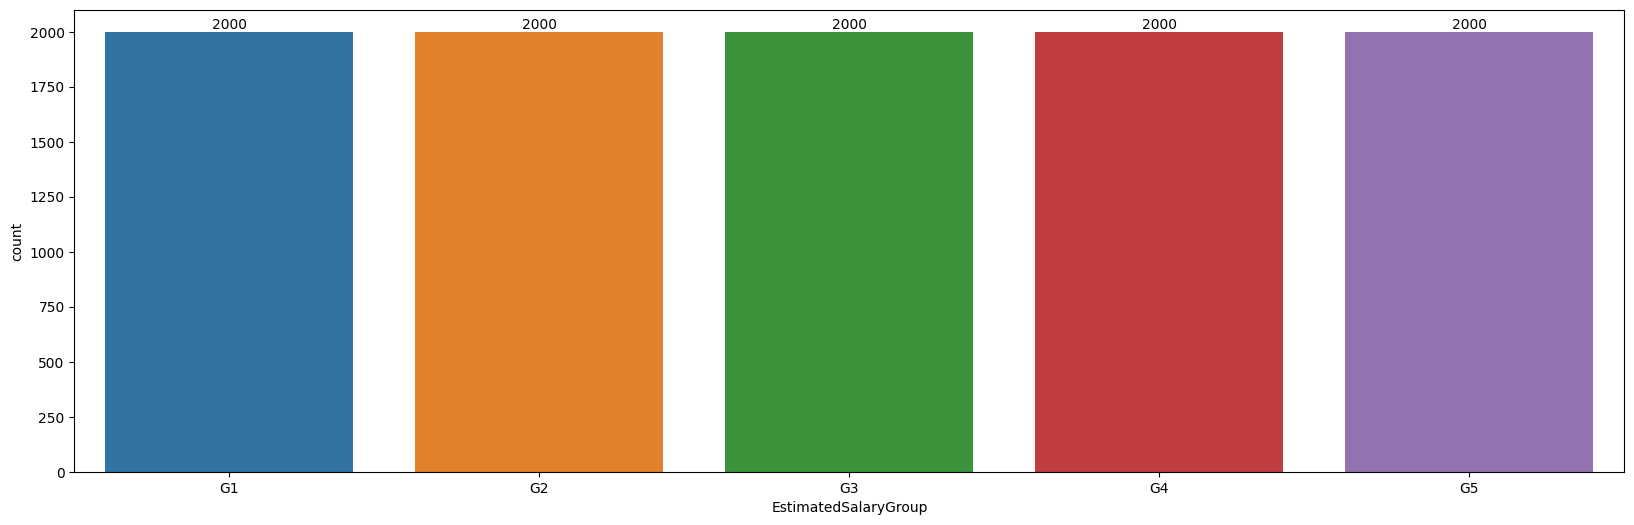

In [ ]:
data['EstimatedSalaryGroup'] = pd.qcut(data['EstimatedSalary'], q=5, labels=['G1','G2','G3','G4','G5'])

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x=data['EstimatedSalaryGroup'])
abs_values = data['EstimatedSalaryGroup'].value_counts().sort_index().values
ax.bar_label(container=ax.containers[0], labels=abs_values);

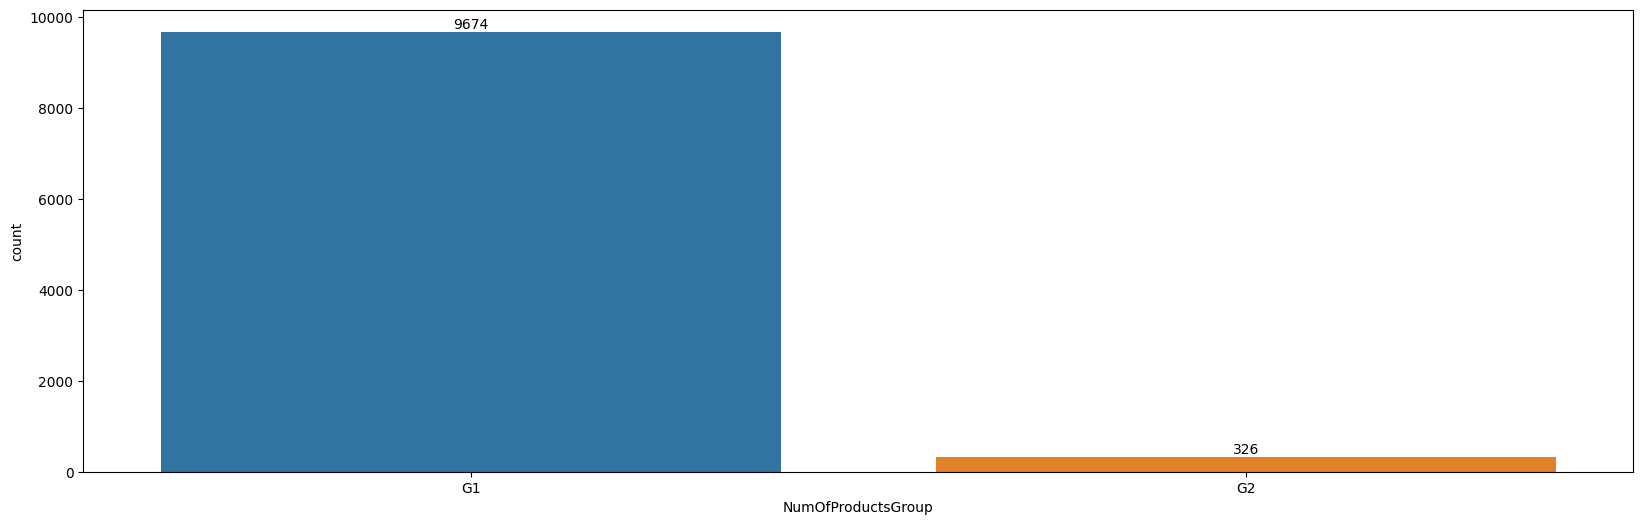

In [ ]:
data['NumOfProductsGroup'] = pd.qcut(data['NumOfProducts'], q=4, duplicates='drop', labels=['G1','G2'])
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x=data['NumOfProductsGroup'])
abs_values = data['NumOfProductsGroup'].value_counts().sort_index().values
ax.bar_label(container=ax.containers[0], labels=abs_values);


In [ ]:
X=data_encoded.drop(['Exited'], axis=1)
y=data_encoded['Exited']

In [ ]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Axes: xlabel='Gender', ylabel='count'>

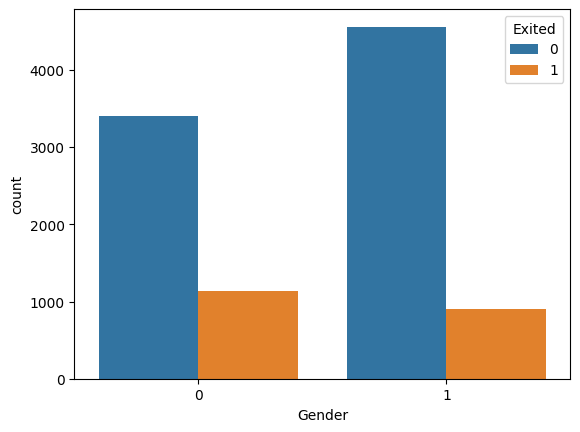

In [ ]:
sns.countplot(x='Gender',hue='Exited',data=data)

<Axes: xlabel='Geography', ylabel='count'>

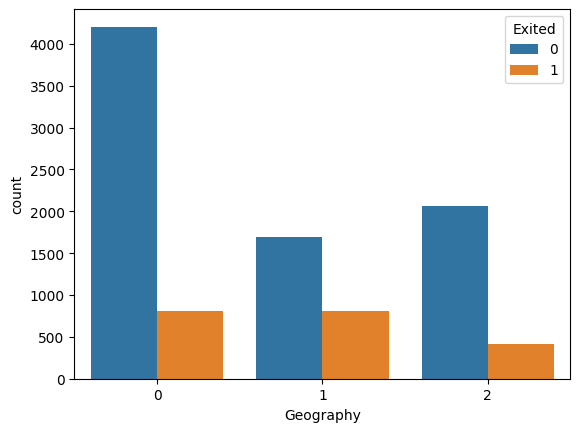

In [ ]:
sns.countplot(x='Geography',hue='Exited',data=data)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
x_feature=ss.fit_transform(x)
x_feature

array([[-1.73187761, -0.32733113, -0.90188624, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.44133106,  1.51506738, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -1.53987591, -0.90188624, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479,  0.60539563, -0.90188624, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 ,  1.25830436,  0.30659057, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761,  1.46557697, -0.90188624, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x_feature,y,test_size=0.2,random_state=1)

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
predict=lr.predict(xtest)
lr.score(xtest,ytest)

0.805

In [ ]:
from sklearn.metrics import accuracy_score
#accuracy score
accuracy_score(ytest,predict)

0.805

In [ ]:
from sklearn.metrics import confusion_matrix

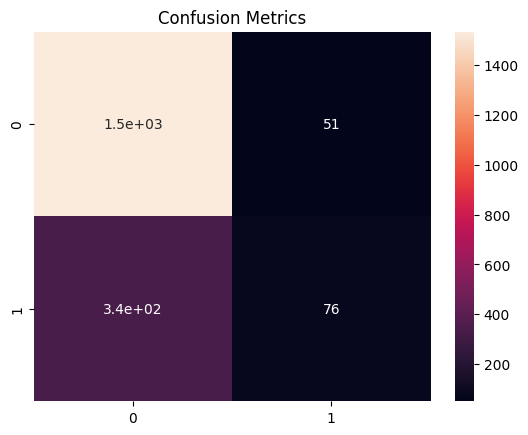

In [ ]:
Cm=confusion_matrix(ytest,predict)
ax=plt.axes()
sns.heatmap(Cm, annot=True,
           annot_kws={'size':10},
           #xticklabels=labels,
           #yticklabels=labels,
            ax=ax
           )

plt.title("Confusion Metrics")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1585
           1       0.60      0.18      0.28       415

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.58      2000
weighted avg       0.77      0.81      0.76      2000



RANDOMFOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)


RandomForestClassifier()

In [ ]:
predict = rf.predict(xtest)
accuracy = accuracy_score(ytest, predict)
print("Accuracy:", accuracy)


Accuracy: 0.863


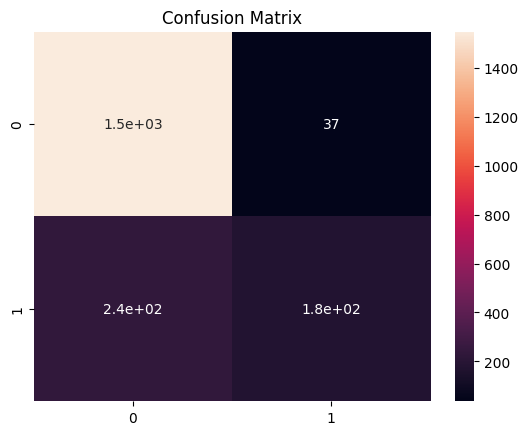

In [ ]:
Cm = confusion_matrix(ytest, predict)
ax = plt.axes()
sns.heatmap(Cm, annot=True, annot_kws={'size': 10}, ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(ytest, predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1585
           1       0.83      0.43      0.57       415

    accuracy                           0.86      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



GRADIENT BOOST

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [ ]:
predict = gb.predict(xtest)
predict
accuracy = accuracy_score(ytest, predict)
print("Accuracy:", accuracy)


Accuracy: 0.864


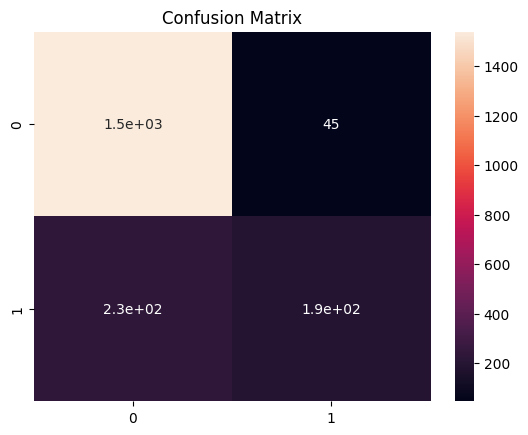

In [ ]:
Cm = confusion_matrix(ytest, predict)
ax = plt.axes()
sns.heatmap(Cm, annot=True, annot_kws={'size': 10}, ax=ax)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print("Classification Report:")
print(classification_report(ytest, predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.81      0.45      0.58       415

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

